### `Project - Thera Bank Personal Loan Campaign`

### `Objective`

The classification goal is to predict the likelihood of a liability customer buying personal loans.


### `Data Description:`

The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

**Attribute Information:**
- ID: Customer ID
- Age: Customer's age in completed years
- Experience: #years of professional experience
- Income: Annual income of the customer (``$``000)
- ZIP Code: Home Address ZIP
- Family: Family size of the customer
- CCAvg: Avg. spending on credit cards per month (`$`000`)
- Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
- Mortgage: Value of house mortgage if any. ($000)
-	Personal Loan: Did this customer accept the personal loan offered in the last campaign?
-	Securities Account: Does the customer have a securities account with the bank?
-	CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
-	Online: Does the customer use internet banking facilities?
-	Credit card: Does the customer use a credit card issued by the bank?
 

### Learning Outcomes:
Exploratory Data Analysis
Preparing the data to train a model
Training and making predictions using a classification model
Model evaluation

### Table of contents

- 1. <a href = #link1> 1 Overview of the data</a>
- 2. <a href = #link2> 2 EDA</a>
- 3. <a href = #link3> 3 Split the data into training and test set </a>
- 4. <a href = #link4> 4Choose the Logistic Regression model</a>
- 5. <a href = #link5>Evaluate Model</a>
- 6. <a href = #link6>Conclusion and Business Insight</a>



## <a id='link1'> 1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation - 5.0 marks </a>


In [851]:
### Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics
# import logistic Regression Model
from sklearn.linear_model import LogisticRegression

In [852]:
loan_df = pd.read_csv('Bank_Personal_Loan_Modelling.csv') #Read in loan data

In [853]:
loan_df.columns = loan_df.columns.str.replace(' ','_') #replace spaces in header with _ 

In [854]:
loan_df.head()

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [855]:
loan_df.info() # check for data type and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP_Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [856]:
#data review
print('*************************Dataset Info************************')
print(loan_df.info())
print()
print()
print('************************DataSet Shape***********************')
print(loan_df.shape)
print()
print()
print('**************************Describe**************************')
print(loan_df.describe().T)
print()
print()
print('***********************Number of nulls*********************')
print(loan_df.isna().sum())
print('***********************************************************')

*************************Dataset Info************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP_Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547

***Insights:*** 
- `There are 5000 rows and 14 columns`
- `There are no missing values and all the data was read in as numbers and integers. We will have to review the data types as this might not make sense`
- `Experience has negative values. The negative values are most likely incorrect and will need to be treated`
- `Income, CCavg, and Mortgage appear to be skewed to the right. We will learn more when we review distrubtion plots`
- `Several of the columns appear to be indicator columns because they only take 0 and 1 as values. We will have to make sure we treat these as categorical data types`

## <a id='link2'> 2.	EDA: Study the data distribution in each attribute and target variable, share your findings </a>

### - Number of unique values in each column?

In [857]:
print('Number of unique values in each column')
print(loan_df.nunique()) # Number of unique values in a column

Number of unique values in each column
ID                    5000
Age                     45
Experience              47
Income                 162
ZIP_Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64


**Insights** 
- `ID column is one to one. We will want to drop this variable before applying logistic regression`
- `ZIP_Code has several values, but is not numeric variable. We will need to review to see if we should keep this variable since the counts for each zip will likely be small and yield little information`
- `Family, Education, Personal_Loan, Securities_account, CD_Account, Online, CreditCard are Catergorical Variables` 

### - 	Number of people with zero mortgage?

In [858]:
print('Number of people with zero mortgage is ',len(loan_df[loan_df.Mortgage==0]))

Number of people with zero mortgage is  3462


***Insight***
- Since over half of the people have zero mortgage, this might be a candidate to make a indicator variable of if someone has a mortgage or not

### - Number of people with zero credit card spending per month?

In [859]:
print('Number of people with zero credit card spending per month is ',len(loan_df[loan_df.CCAvg==0]))

Number of people with zero credit card spending per month is  106


### - Value counts of all categorical columns.

In [860]:
cat_columns =['ID','ZIP_Code', 'Family', 
       'Education', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard']
for i in list(cat_columns):   # checking value counts of all categorical Columns
    print(loan_df[i].value_counts(normalize=True))
    print()

2047    0.0002
2608    0.0002
4647    0.0002
2600    0.0002
553     0.0002
         ...  
3263    0.0002
1218    0.0002
3267    0.0002
1222    0.0002
2049    0.0002
Name: ID, Length: 5000, dtype: float64

94720    0.0338
94305    0.0254
95616    0.0232
90095    0.0142
93106    0.0114
          ...  
96145    0.0002
94970    0.0002
94598    0.0002
90068    0.0002
94087    0.0002
Name: ZIP_Code, Length: 467, dtype: float64

1    0.2944
2    0.2592
4    0.2444
3    0.2020
Name: Family, dtype: float64

1    0.4192
3    0.3002
2    0.2806
Name: Education, dtype: float64

0    0.904
1    0.096
Name: Personal_Loan, dtype: float64

0    0.8956
1    0.1044
Name: Securities_Account, dtype: float64

0    0.9396
1    0.0604
Name: CD_Account, dtype: float64

1    0.5968
0    0.4032
Name: Online, dtype: float64

0    0.706
1    0.294
Name: CreditCard, dtype: float64



***Insights***
- We will need to drop ID column since it is one to one. I will drop the variables in one step before the training step
- ZIP_Code will need to be dropped since there is a maximum of 3.4% of total population in one zip. An idea for next steps would be to map ZIP to county or state or region so there more counts per category 
- The target variable Person_Loan has 9.6% values that are 1. This pretty low

### Univariate and Bivariate

#### Univariate Analysis

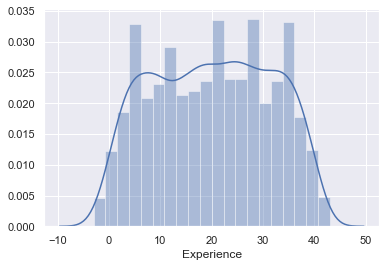

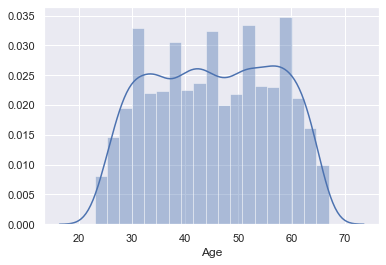

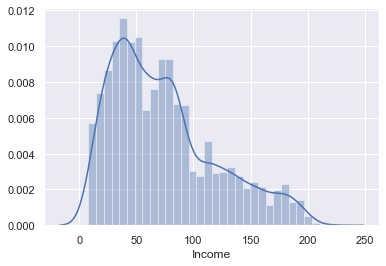

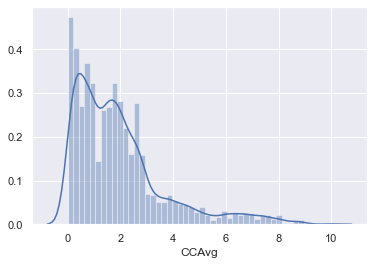

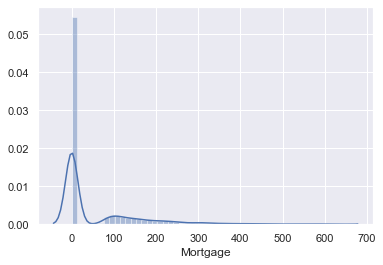

In [861]:
# distplot for continous columns
for i in ['Experience','Age','Income','CCAvg','Mortgage']:
    sns.distplot(loan_df[i])
    plt.show()

***Insight***
- Experience and Age are pretty uniformally distributed. Experience has negative values. It is worth taking a closer look at
- Income, CCavg and Mortgage are right skewed. I am going to create categorical variables from these variable to have more of an uniform distribution. This could help with predictive power of the logistic regression model 

In [862]:
# Reviewing the negative Experience observations
negExperience_df=loan_df[loan_df.Experience<0]
negExperience_df

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


*** Insights ***
Experience should have a lower bound of zero. But as a check we can see that customers with negative experience also had income. Age and experience most likely are correlated and might be able to impute experience from age

In [863]:
loan_df[loan_df.Experience>=0].groupby(['Age'])['Experience'].median()

Age
24     0
25     1
26     1
27     2
28     3
29     4
30     5
31     5
32     7
33     8
34     9
35    10
36    11
37    12
38    13
39    14
40    15
41    16
42    17
43    18
44    19
45    20
46    21
47    22
48    23
49    24
50    25
51    26
52    27
53    28
54    29
55    30
56    31
57    32
58    33
59    34
60    35
61    36
62    37
63    38
64    39
65    40
66    41
67    42
Name: Experience, dtype: int64

*** Insight *** 
-  After reviewing median experience by age, I am going to use age to impute experience for the negative experience values since they are correlated

In [864]:
# Creating a lku table 
Age_Experience_LKU=loan_df[loan_df.Experience>=0].groupby(['Age'])['Experience'].median().to_frame()

In [865]:
# Adding lku up column to loan_df
loan_df =pd.merge(loan_df, Age_Experience_LKU, on ='Age' ,how='left', suffixes=(None,'_lku'))

In [866]:

#Create a function to apply median to negative value in Experience Column or zero if the median doesn't exist in lookup table
def exp_update (row):
   if row['Experience'] >= 0 :
      return row['Experience']
   if row['Experience'] <0 and row['Experience_lku']>=0 :
      return row['Experience_lku']

   return 0

In [869]:
#Add Experience_new column to data set
loan_df['Experience_new']=test.apply(lambda row: exp_update(row), axis=1)
print('There are',len(loan_df[loan_df.Experience_new >=0]),'observations greater than 0 in new experience column')

There are 5000 observations greater than 0 in new experience column


In [870]:
loan_df.drop('Experience_lku', axis=1, inplace = True) #drop lookup column

***Create Categorical Variables from Mortgage, CCAvg and Income***

In [871]:
loan_df[['CCAvg','Mortgage','Income']].describe().T

,count,mean,std,min,25%,50%,75%,max
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0


In [872]:
# create bins for Income Categories using quartiles
bins = [7, 39, 64, 98, 225]

In [873]:
# adding Income Categories to data set
cats = ['7-38', '39-63', '64-97', '98-225']
loan_df["Income_cat"] = pd.cut(loan_df.Income, bins, labels=cats)
loan_df['Income_cat']

0        39-63
1         7-38
2         7-38
3       98-225
4        39-63
         ...  
4995     39-63
4996      7-38
4997      7-38
4998     39-63
4999     64-97
Name: Income_cat, Length: 5000, dtype: category
Categories (4, object): [7-38 < 39-63 < 64-97 < 98-225]

In [874]:
#Create bins for CCAvg based on quartiles
bins = [-1, 0.7, 1.5, 2.5, 11]

In [875]:
#Add CCAvg categories to data set
cats = ['0-0.6', '0.7-1.4', '1.5-2.4', '2.5-11']
loan_df["CCAvg_cat"] = pd.cut(loan_df.CCAvg, bins, labels=cats)
loan_df.head()

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Experience_new,Income_cat,CCAvg_cat
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,1.0,39-63,1.5-2.4
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,19.0,7-38,0.7-1.4
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,15.0,7-38,0.7-1.4
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,9.0,98-225,2.5-11
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,8.0,39-63,0.7-1.4


In [876]:
#Checking distrubtion of Mortgages
loan_df['Mortgage'].value_counts(normalize=True)

0      0.6924
98     0.0034
103    0.0032
119    0.0032
83     0.0032
        ...  
541    0.0002
509    0.0002
505    0.0002
485    0.0002
577    0.0002
Name: Mortgage, Length: 347, dtype: float64

In [877]:
# Creating a Mortgage indicator. The reason for indicator is that more than 50% of the mortgages are zero.
loan_df['hasMortgage'] = np.where(loan_df['Mortgage']!= 0, 1, 0)
loan_df.head()

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Experience_new,Income_cat,CCAvg_cat,hasMortgage
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,1.0,39-63,1.5-2.4,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,19.0,7-38,0.7-1.4,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,15.0,7-38,0.7-1.4,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,9.0,98-225,2.5-11,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,8.0,39-63,0.7-1.4,0


In [878]:
loan_df.dtypes

ID                       int64
Age                      int64
Experience               int64
Income                   int64
ZIP_Code                 int64
Family                   int64
CCAvg                  float64
Education                int64
Mortgage                 int64
Personal_Loan            int64
Securities_Account       int64
CD_Account               int64
Online                   int64
CreditCard               int64
Experience_new         float64
Income_cat            category
CCAvg_cat             category
hasMortgage              int32
dtype: object

***Review count plots for the Categorical Variables***

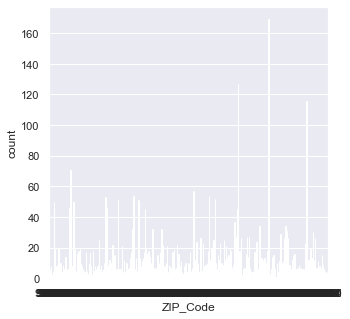

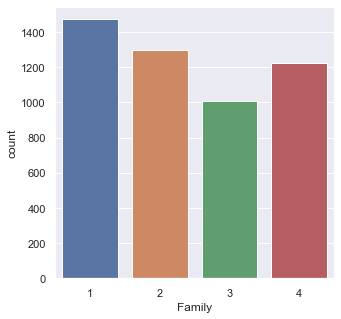

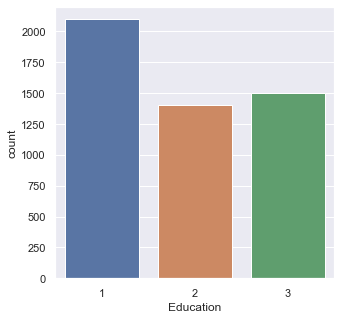

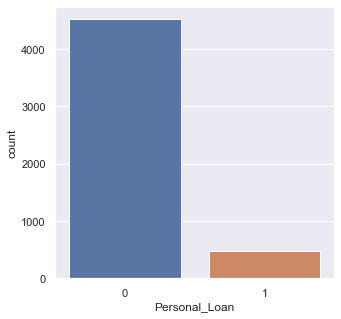

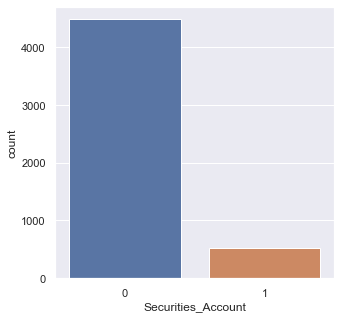

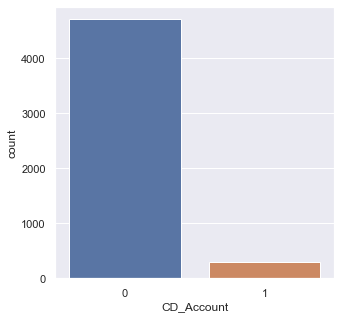

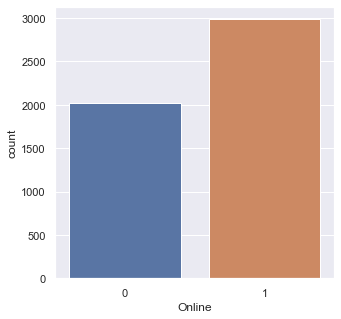

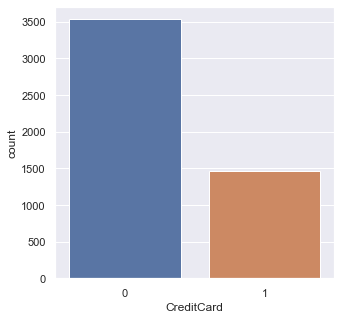

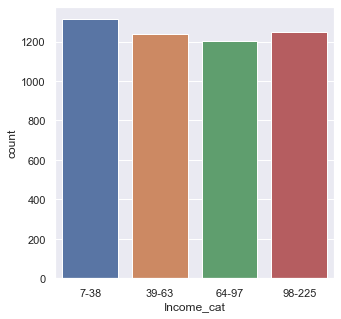

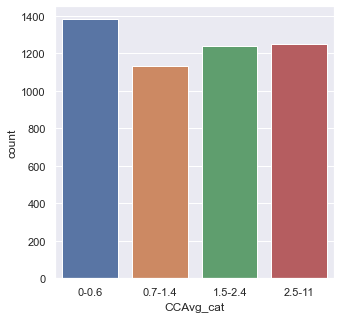

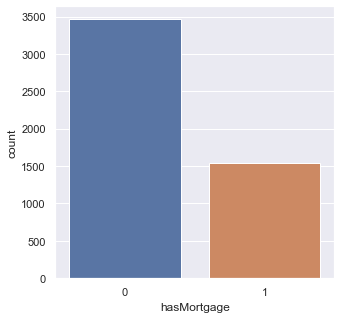

In [879]:
for i in ['ZIP_Code', 'Family',\
       'Education', 'Personal_Loan', 'Securities_Account',\
       'CD_Account', 'Online', 'CreditCard','Income_cat', 'CCAvg_cat',\
       'hasMortgage']:
    plt.figure(figsize=(5,5))
    sns.countplot(loan_df[i])
    plt.show()

***Insights***
- Zip_code has a lot of categories. As mentioned before, this variable will most likely need dropped
- Family is pretty well distributed between categories
- Education is pretty well distrubted between categories
- Personal loan: Most people don't get a personal loan. 
- Security_account: Most people don't have a Security account
- Cd_Account: Most people don't have a security account
- Online: There is a mixture of online
- CreditCard: there is a mixture of categories for CreditCard
- Income_cat looks well distributed as designed
- CCAvg_cat looks well distributed as designed
- hasMortgage is well distributed 

In [880]:
#Calculate baseline proportion - ratio of Yes to No to identify data imbalance
prop_Y = loan_df['Personal_Loan'].value_counts(normalize=True)
print(prop_Y)

0    0.904
1    0.096
Name: Personal_Loan, dtype: float64


In [881]:
loan_df.isnull().sum() #check null values

ID                    0
Age                   0
Experience            0
Income                0
ZIP_Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
Experience_new        0
Income_cat            0
CCAvg_cat             0
hasMortgage           0
dtype: int64

**Insights** No null values

In [882]:
#Convert X & Y variable to a categorical variable wherever relevant
loan_df['ID'] = loan_df['ID'].astype('category')
loan_df['Personal_Loan'] = loan_df['Personal_Loan'].astype('category')
loan_df['ZIP_Code'] = loan_df['ZIP_Code'].astype('category')
loan_df['Education'] = loan_df['Education'].astype('category')
loan_df['Securities_Account'] = loan_df['Securities_Account'].astype('category')
loan_df['CD_Account'] = loan_df['CD_Account'].astype('category')
loan_df['CreditCard'] = loan_df['CreditCard'].astype('category')
loan_df['Online'] = loan_df['Online'].astype('category')
loan_df['Family'] = loan_df['Family'].astype('category')
loan_df['hasMortgage']=loan_df['hasMortgage'].astype('category')


In [883]:
print("Check data types")
loan_df.dtypes

Check data types


ID                    category
Age                      int64
Experience               int64
Income                   int64
ZIP_Code              category
Family                category
CCAvg                  float64
Education             category
Mortgage                 int64
Personal_Loan         category
Securities_Account    category
CD_Account            category
Online                category
CreditCard            category
Experience_new         float64
Income_cat            category
CCAvg_cat             category
hasMortgage           category
dtype: object

### Bivariate Analysis

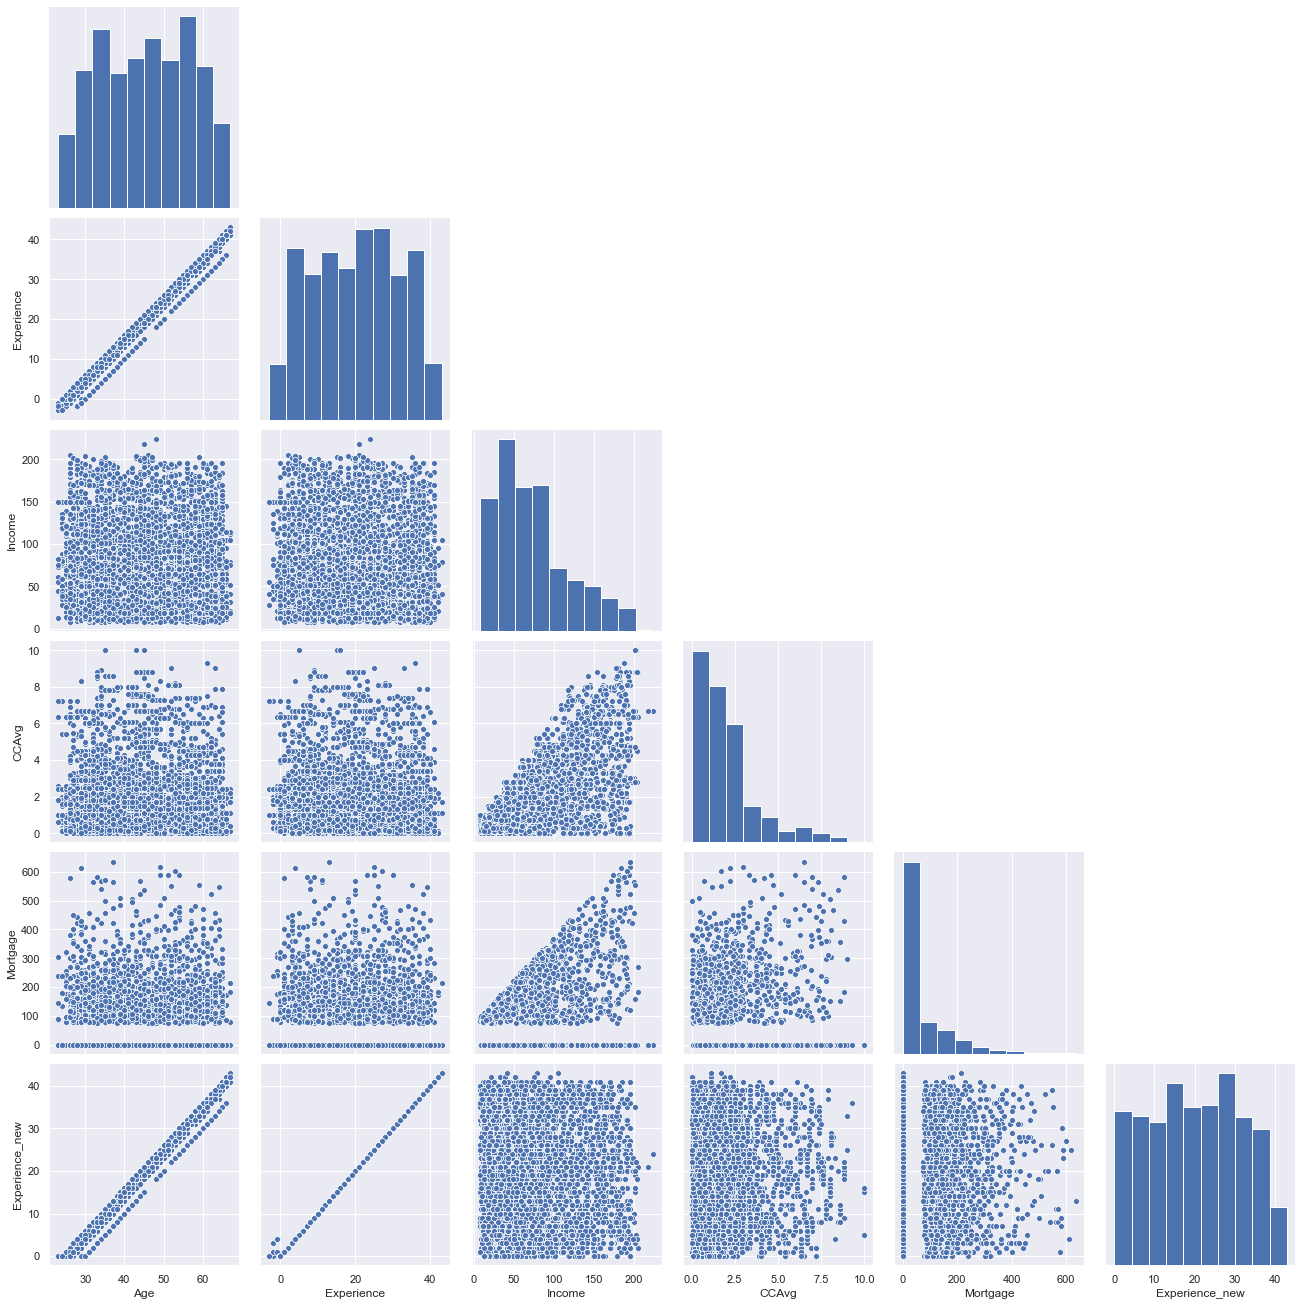

In [884]:
columns = ['Age','Experience','Income','CCAvg','Mortgage','Experience_new']
sns.pairplot(loan_df[columns], height=3, diag_kind='auto', corner=True)
plt.show()

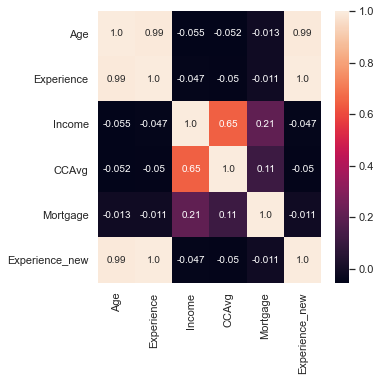

In [885]:
plt.figure(figsize=(5,5))
sns.heatmap(loan_df[columns].corr(), annot=True, fmt=".2")
plt.show()

**Insights** Age and Experience are correlated.There is a chance that we can drop one when model fitting

In [886]:
loan_df.groupby(["Personal_Loan"]).mean()

,Age,Experience,Income,CCAvg,Mortgage,Experience_new
Personal_Loan,,,,,,
0,45.367257,20.132301,66.237389,1.729009,51.789381,20.156416
1,45.066667,19.843750,144.745833,3.905354,100.845833,19.843750


In [887]:
loan_df.groupby(["Personal_Loan"]).median()

,Age,Experience,Income,CCAvg,Mortgage,Experience_new
Personal_Loan,,,,,,
0,45.0,20.0,59.0,1.4,0.0,20.0
1,45.0,20.0,142.5,3.8,0.0,20.0


***Insights***
- Income and avg credit card spend is higher for people who accepted loan during last campaign 

In [888]:
pd.crosstab(loan_df['ZIP_Code'],loan_df['Personal_Loan'],normalize='index')

Personal_Loan,0,1
ZIP_Code,,
9307,1.0,0.0
90005,1.0,0.0
90007,1.0,0.0
90009,1.0,0.0
90011,1.0,0.0
...,...,...
96091,1.0,0.0
96094,1.0,0.0
96145,1.0,0.0


***Insight***
- There are too many zip codes to gain insight

In [889]:
pd.crosstab(loan_df['Education'],loan_df['Personal_Loan'],normalize='index')

Personal_Loan,0,1
Education,,
1,0.955630,0.044370
2,0.870278,0.129722
3,0.863424,0.136576


***Insights***
- Customers with Graduate and Advanced/Professional education are more likely to get accept personal loan

In [890]:
pd.crosstab(loan_df['Securities_Account'],loan_df['Personal_Loan'],normalize='index')

Personal_Loan,0,1
Securities_Account,,
0,0.906208,0.093792
1,0.885057,0.114943


***Insights***
- There is not much difference between customers having a securities account or not and accepting personal loan

In [892]:
pd.crosstab(loan_df['CD_Account'],loan_df['Personal_Loan'],normalize='index')

Personal_Loan,0,1
CD_Account,,
0,0.927629,0.072371
1,0.536424,0.463576


***Insights***
- Customers with CD account are more likely to get accept personal loan

In [893]:
pd.crosstab(loan_df['Online'],loan_df['Personal_Loan'],normalize='index')

Personal_Loan,0,1
Online,,
0,0.90625,0.09375
1,0.90248,0.09752


***Insights***
- There is not much difference between customers having a online account and accepting personal loan

In [894]:
pd.crosstab(loan_df['CreditCard'],loan_df['Personal_Loan'],normalize='index')

Personal_Loan,0,1
CreditCard,,
0,0.904533,0.095467
1,0.902721,0.097279


***Insights***
- There is not much difference between customers having a credit card and accepting personal loan

In [895]:
pd.crosstab(loan_df['Family'],loan_df['Personal_Loan'],normalize='index')

Personal_Loan,0,1
Family,,
1,0.927310,0.072690
2,0.918210,0.081790
3,0.868317,0.131683
4,0.890344,0.109656


***Insights***
- Customers with 3 or more family members  are more likely to accept personal loan

In [896]:
pd.crosstab(loan_df['Income_cat'],loan_df['Personal_Loan'],normalize='index')

Personal_Loan,0,1
Income_cat,,
7-38,1.000000,0.000000
39-63,0.998384,0.001616
64-97,0.971761,0.028239
98-225,0.643660,0.356340


***Insights***
- Customer are more likely to accept personal loan when income is greater than 64k

In [897]:
pd.crosstab(loan_df['hasMortgage'],loan_df['Personal_Loan'],normalize='index')

Personal_Loan,0,1
hasMortgage,,
0,0.909879,0.090121
1,0.890767,0.109233


***Insights***
- The difference between if a member has a mortgage or not is nominal in if person accepts personal loan

In [898]:
pd.crosstab(loan_df['CCAvg_cat'],loan_df['Personal_Loan'],normalize='index')

Personal_Loan,0,1
CCAvg_cat,,
0-0.6,0.971760,0.028240
0.7-1.4,0.965608,0.034392
1.5-2.4,0.967664,0.032336
2.5-11,0.709936,0.290064


***Insights***
- Customer are more likely to accept personal loan when credit card spend is is greater than 2.5k a month

In [899]:
loan_df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP_Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard', 'Experience_new', 'Income_cat',
       'CCAvg_cat', 'hasMortgage'],
      dtype='object')

###  Get data model ready

In [900]:
## Define X and Y variables

X = loan_df.drop(['ID','Personal_Loan','CreditCard','ZIP_Code','Mortgage','CCAvg','Income','Experience','hasMortgage','Online'], axis=1)
y = loan_df['Personal_Loan']  

In [901]:
X = pd.get_dummies(X, drop_first=True) # create hot encoding

In [902]:
X.sample(6)

,Age,Experience_new,Family_2,Family_3,Family_4,Education_2,Education_3,Securities_Account_1,CD_Account_1,Income_cat_39-63,Income_cat_64-97,Income_cat_98-225,CCAvg_cat_0.7-1.4,CCAvg_cat_1.5-2.4,CCAvg_cat_2.5-11
3436,56,29.0,0,0,1,1,0,0,0,1,0,0,0,1,0
4924,36,12.0,1,0,0,0,0,0,0,0,1,0,0,0,1
577,52,28.0,1,0,0,0,0,0,0,0,0,1,0,0,1
328,60,35.0,0,1,0,1,0,0,0,1,0,0,0,0,0
627,45,19.0,0,1,0,0,0,0,0,0,1,0,0,1,0
1397,65,41.0,0,1,0,0,1,0,0,1,0,0,0,0,0


###  <a id='link3'> 3.	Split the data into training and test set in the ratio of 70:30 respectively (5 marks) </a>

In [903]:
##Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=1)

In [904]:
X_train.shape

(3500, 15)

In [905]:
y_train.describe()

count     3500
unique       2
top          0
freq      3169
Name: Personal_Loan, dtype: int64

### <a id='link4'> 4.	Use the Logistic Regression model to predict whether the customer will take a personal loan or not. Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusion matrix (15 marks) </a>

In [906]:
logreg = LogisticRegression(random_state=4400003,fit_intercept=False,solver = 'liblinear')
logreg.fit(X_train, y_train) # fit the model on train data

LogisticRegression(fit_intercept=False, random_state=4400003,
                   solver='liblinear')

In [907]:
y_predict = logreg.predict(X_test)              # Predicting the target variable on test data

In [908]:
z = X_test.copy()
z['Observed Loan Status'] = y_test
z['Predicted Loan Status'] = y_predict
z.head()

,Age,Experience_new,Family_2,Family_3,Family_4,Education_2,Education_3,Securities_Account_1,CD_Account_1,Income_cat_39-63,Income_cat_64-97,Income_cat_98-225,CCAvg_cat_0.7-1.4,CCAvg_cat_1.5-2.4,CCAvg_cat_2.5-11,Observed Loan Status,Predicted Loan Status
2764,31,5.0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
4767,35,9.0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0
3814,34,9.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3499,49,23.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2735,36,12.0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0


In [909]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.9648571428571429

Testing accuracy 0.9573333333333334

Confusion Matrix


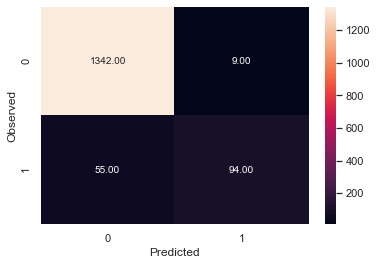

None

Recall: 0.6308724832214765

Precision: 0.912621359223301

F1 Score: 0.746031746031746

Roc Auc Score: 0.8121053755855717


In [910]:
print("Trainig accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:", metrics.recall_score(y_test,y_predict))
print()
print("Precision:", metrics.precision_score(y_test,y_predict))
print()
print("F1 Score:", metrics.f1_score(y_test,y_predict))
print()
print("Roc Auc Score:", metrics.roc_auc_score(y_test,y_predict))

### <a id='link5'> 5.	Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class. (10 marks)</a>

In [911]:
## Feature Importance or Coefficients 
fi = pd.DataFrame()
fi['Col'] = X_train.columns
fi['Coeff'] = np.round(abs(logreg.coef_[0]),2)
fi.sort_values(by='Coeff',ascending=False)

,Col,Coeff
11,Income_cat_98-225,4.86
6,Education_3,3.12
5,Education_2,2.90
8,CD_Account_1,2.26
3,Family_3,2.25
14,CCAvg_cat_2.5-11,1.87
9,Income_cat_39-63,1.69
4,Family_4,1.49
13,CCAvg_cat_1.5-2.4,1.02
7,Securities_Account_1,0.87


In [913]:
ObservednePredicted=z[z['Observed Loan Status']!=z['Predicted Loan Status']]
print('*******Rows where Observed loan status did not equal Predicted Loan Status in test data *************** ')

ObservednePredicted


*******Rows where Observed loan status did not equal Predicted Loan Status in test data *************** 


,Age,Experience_new,Family_2,Family_3,Family_4,Education_2,Education_3,Securities_Account_1,CD_Account_1,Income_cat_39-63,Income_cat_64-97,Income_cat_98-225,CCAvg_cat_0.7-1.4,CCAvg_cat_1.5-2.4,CCAvg_cat_2.5-11,Observed Loan Status,Predicted Loan Status
932,51,27.0,0,1,0,1,0,1,1,0,0,1,0,1,0,0,1
3988,59,35.0,0,0,0,0,1,0,1,0,1,0,0,0,1,1,0
3271,52,27.0,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0
349,26,2.0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0
927,65,40.0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,43,19.0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0
2625,61,36.0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1
813,50,25.0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0
3651,49,23.0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0


### <a id='link6'> 6.	Give conclusion related to the Business understanding of your model? (5 marks)</a>


### `Confusion matrix means`

*True Positive (observed=1,predicted=1):*

Predicted Personal Loan Taker and the customer is actually a Personal Loan Taker.

*False Positive (observed=0,predicted=1):*

Predicted Personal Loan Taker and the customer is not a Personal Loan Taker.

*True Negative (observed=0,predicted=0):*

Predicted Personal Loan Decliner and the customer is a Personal Loan Decliner.

*False Negative (observed=1,predicted=0):*

Predicted Personal Loan Decliner and the customer is a Personal Loan Taker.

### `Important Metric`

The goal of the model to target liability customers that have a high probability of converting into a personal loan customer aka a cross sell. As Cross-selling is typically a cheaper way to obtain a customer,the bank should focus on reducing the number of **False Negatives**. Right now,the recall is 63% driven by 55 False Negatives. The goal should beto reduce the False negative while balancing the cost of marketing to the targeted members. The next steps would be to calculate the cost of marketing to targeted members along with the expected revenue with cross sold personal loan customers

